In [1]:
import numpy as np
import pandas as pd #dataset Manipulation 
import matplotlib.pyplot as plt #Plotting
import time
from IPython import display
%matplotlib inline

In [2]:
dataset = pd.read_csv('NA-DS101.csv')
data = dataset.to_numpy()
numInstances = data.shape[0]
dataset.head(10)


,Index,"""Height""","""Weight"""
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
5,6,68.69784,123.3024
6,7,69.80204,141.4947
7,8,70.01472,136.4623
8,9,67.90265,112.3723
9,10,66.78236,120.6672


In [3]:
def SSE(b0,b1,data):
    
    totalError = 0.0
    numDataPoints = len(data)
    
    for i in range(0,numDataPoints):
        
        #Get current pair (x,y)
        x = data[i,1]
        y = data[i,2]
        
        #The real rating
        actualRead = y
        
        #Predicted rating with our current fitting line
        #y = b1x + b0
        predictedRead = b0 + b1*x
        
        #Compute squared error
        error = (actualRead - predictedRead)**2

        
        #Add it to the total error
        totalError += error
    
    return totalError/float(numDataPoints)

In [21]:
def update_weights(b0, b1, Data, learningRate):
    SumDb0 = 0
    SumDb1 = 0
    numDataPoints = len(data)
    
    for i in range(0,numDataPoints):
       
        #Get current pair (x,y)
        x = data[i,1]
        y = data[i,2]
    
        # Calculate partial derivatives
        
        # -2(y - (b0 + b1x))
        db0 = -2 * (y - (b0 + b1*x))
        # -2x(y - (b1x + b0))
        db1 = db0 * x
        
        SumDb0 += db0
        SumDb1 += db1
        
    AvgDb0 =  SumDb0 / float(numDataPoints)
    AvgDb1 =  SumDb1 / float(numDataPoints)
    
    
    b0 -= AvgDb0 * learningRate
    b1 -= AvgDb1 * learningRate
    return b0, b1
    

In [22]:
b0 = 1000
b1 = 2
learningRate = 0.0001

sse = SSE(b0,b1,data)

print('Starting line: [y = %.2f + %.2fx]  SSE: %.2f' %(b0,b1,sse))

for i in range(2):
    
    b0,b1 = update_weights(b0,b1,data,learningRate)
    sse = SSE(b0,b1,data)
    print('At step %d - Line: [y = %.2f + %.2fx] SSE: %.2f' %(i+1,b0,b1,sse))

Starting line: [y = 1000.00 + 2.00x]  SSE: 1017998.78
At step 1 - Line: [y = 999.80 + -11.72x] SSE: 6656.32
At step 2 - Line: [y = 999.78 + -12.74x] SSE: 1048.51


In [23]:
def trainGD(b0,b1,data,learningRate,numSteps):
    for i in range(numSteps):
        b0,b1 = update_weights(b0,b1,data,learningRate)
    return b0,b1


In [29]:
b0 = 3
b1 = 2
learningRate = 0.0001
steps = 1000

sse = SSE(b0,b1,data)
print('Pre-training: [y = %.2f + %.2fx]  SSE: %.2f' %(b0,b1,sse))
b0,b1 = trainGD(b0,b1,data,learningRate,steps)
sse = SSE(b0,b1,data)
print('Post-training line: [y = %.2f + %.2fx]  SSE: %.2f' %(b0,b1,sse))

Pre-training: [y = 3.00 + 2.00x]  SSE: 247.61
Post-training line: [y = 2.98 + 1.83x]  SSE: 107.31


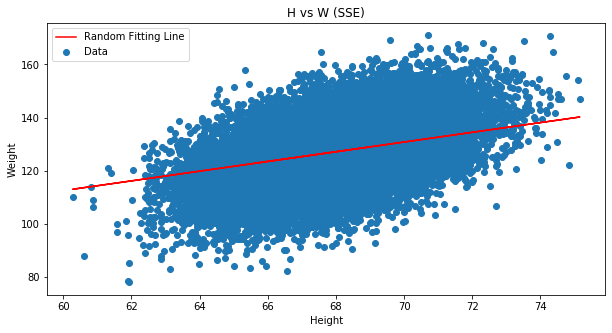

In [30]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.set_title('H vs W (SSE)')
ax.scatter(x=data[:,1],y=data[:,2],label='Data')

plt.plot(data[:,1], b1*data[:,1] + b0,color='red',label='Random Fitting Line')
ax.legend(loc='best')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()